# Creating final time series data set for san antonio valley

## Steps performed

### 1. Filtered forest fire data for san antonio valley
### 2. Labelled all rows with Forest fire =Y
### 3.fetched weather data for san antonio valley centroid
### 4. Added weather data for hourly timestamp where no forest fire data is available and marking it as forest fire=N
### 5. P.S- this data will have negative samples and NASA column contains null values

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import time
import multiprocessing as mp

In [2]:
merged_dataset = pd.read_csv('data/long_lat_merged_v2.csv')

In [3]:
merged_dataset.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,0,37.31750,-122.09219,295.9,0.37,0.58,2020-01-04,10:42:00,N20,J1 VIIRS C1,...,222.51040,12.959999,6.1405,9.0905,11.190500,16.8405,0.429,0.445,0.422,0.378
1,1,37.45576,-121.93266,298.7,0.38,0.58,2020-01-04,10:42:00,N20,J1 VIIRS C1,...,137.12111,7.920000,6.3525,9.6525,12.002501,17.4525,0.352,0.370,0.377,0.347
2,2,37.31704,-122.09343,301.3,0.42,0.45,2020-01-05,10:24:00,N20,J1 VIIRS C1,...,304.24908,22.319998,5.8015,9.3015,11.151501,16.7015,0.418,0.436,0.421,0.378
3,3,37.31878,-122.09222,296.0,0.41,0.37,2020-01-06,10:06:00,N20,J1 VIIRS C1,...,301.82740,18.359999,5.1490,8.8490,11.249001,16.6990,0.413,0.432,0.421,0.378
4,4,37.45645,-121.93143,305.3,0.41,0.37,2020-01-06,10:06:00,N20,J1 VIIRS C1,...,320.82635,10.440001,5.3090,9.3590,11.959001,17.2090,0.339,0.358,0.374,0.348


In [4]:
len(merged_dataset)

9786

In [5]:
merged_dataset.dtypes

Unnamed: 0                         int64
latitude                         float64
longitude                        float64
brightness                       float64
scan                             float64
track                            float64
acq_date                          object
acq_time                          object
satellite                         object
instrument                        object
confidence                        object
version                           object
bright_t31                       float64
frp                              float64
daynight                          object
type                             float64
Severity                         float64
Unnamed: 16                      float64
round_time                        object
date                              object
temperature_2m                   float64
relative_humidity_2m             float64
dew_point_2m                     float64
apparent_temperature             float64
precipitation   

## plotted the data on graph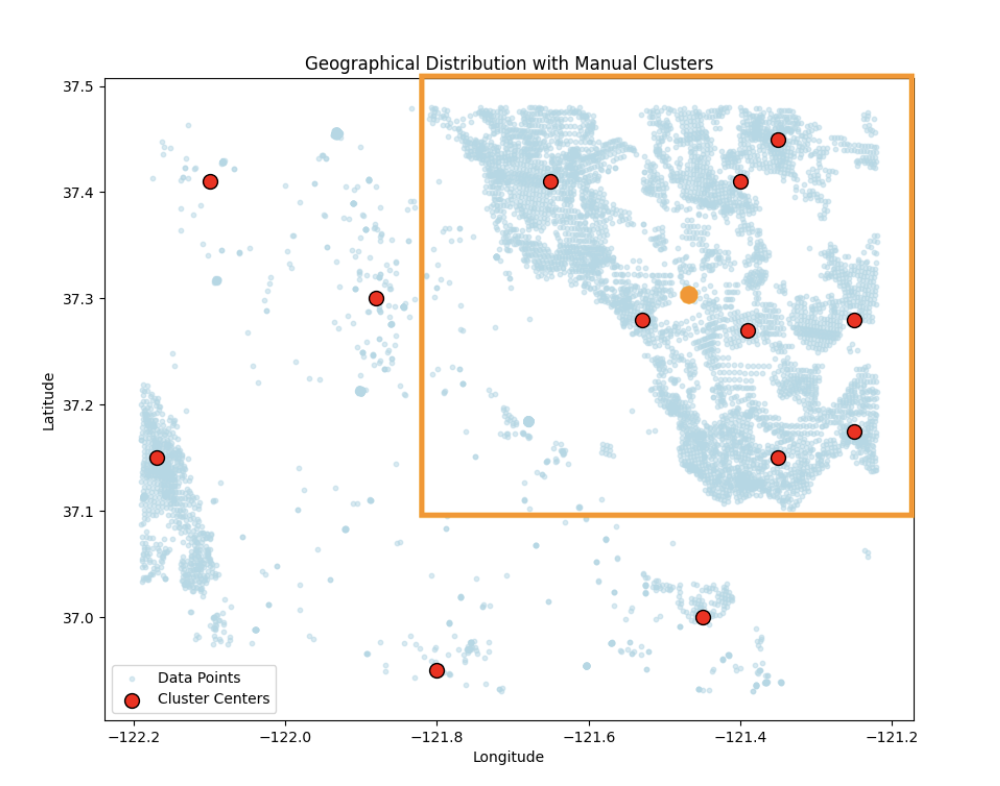

## filtering data according to the centroids and cluster boundary

## cluster boundaries are:
### longitude,latitude
### point a-   -121.8, 37.5 
### point b-   -121.8, 37.1
### point c-   -121.2, 37.1
### point d-   -121.2, 37.5

### centroid-  -121.5, 37.3

### filtering data inside the boundary

In [6]:
filtered_df= pd.DataFrame()
for index, row in merged_dataset.iterrows():
    if (row['longitude'] >= -121.8) and (row['longitude']<= -121.2) and (row['latitude']>= 37.1) and (row['latitude']<= 37.5):
        filtered_df=pd.concat([filtered_df, row.to_frame().T])

In [7]:
filtered_df.describe

<bound method NDFrame.describe of      Unnamed: 0   latitude  longitude brightness   scan   track    acq_date  \
7             7   37.18483 -121.67795      296.7   0.41    0.37  2020-01-07   
8             8   37.18447 -121.68083      298.7   0.41    0.37  2020-01-07   
10           10   37.18439 -121.68135      295.3   0.39    0.36  2020-01-12   
18           18   37.18606 -121.68154      295.3   0.41    0.37  2020-01-23   
20           20   37.18626 -121.67877      296.8   0.42    0.45  2020-01-24   
...         ...        ...        ...        ...    ...     ...         ...   
9779       9779  37.184309 -121.67957        NaN  634.0  4976.0  2023-12-25   
9780       9780  37.184039 -121.67958        NaN  634.0  4977.0  2023-12-25   
9781       9781  37.184576 -121.67923        NaN  635.0  4975.0  2023-12-25   
9782       9782  37.184305 -121.67924        NaN  635.0  4976.0  2023-12-25   
9783       9783  37.184035 -121.67924        NaN  635.0  4977.0  2023-12-25   

      acq_time sa

In [8]:
len(filtered_df)

6424

In [9]:
filtered_df.head(5)

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
7,7,37.18483,-121.67795,296.7,0.41,0.37,2020-01-07,09:48:00,N20,J1 VIIRS C1,...,347.73523,12.959999,5.0485,8.7485,11.0985,15.948501,0.414,0.436,0.455,0.424
8,8,37.18447,-121.68083,298.7,0.41,0.37,2020-01-07,09:48:00,N20,J1 VIIRS C1,...,347.73523,12.959999,5.211,8.911,11.261,16.111,0.414,0.436,0.455,0.424
10,10,37.18439,-121.68135,295.3,0.39,0.36,2020-01-12,09:54:00,N20,J1 VIIRS C1,...,338.4985,17.28,5.524,8.824,10.974,15.724,0.426,0.43,0.451,0.424
18,18,37.18606,-121.68154,295.3,0.41,0.37,2020-01-23,09:48:00,N20,J1 VIIRS C1,...,36.86999,6.12,8.109,10.559,10.358999,14.759,0.444,0.447,0.443,0.425
20,20,37.18626,-121.67877,296.8,0.42,0.45,2020-01-24,09:30:00,N20,J1 VIIRS C1,...,336.94867,20.519999,8.379499,10.2295,10.2795,14.4295,0.441,0.452,0.444,0.425


In [11]:
filtered_df=filtered_df.drop(['Unnamed: 0','acq_time'], axis=1)

In [12]:
filtered_df['date_time']=pd.to_datetime(filtered_df['acq_date'] + ' ' + filtered_df['round_time'])

In [13]:
filtered_df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight', 'type', 'Severity', 'Unnamed: 16', 'round_time', 'date',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'date_time'],
      dtype='object')

In [14]:
filtered_df.head(5)

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,confidence,version,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,date_time
7,37.18483,-121.67795,296.7,0.41,0.37,2020-01-07,N20,J1 VIIRS C1,n,2.0NRT,...,12.959999,5.0485,8.7485,11.0985,15.948501,0.414,0.436,0.455,0.424,2020-01-07 10:00:00
8,37.18447,-121.68083,298.7,0.41,0.37,2020-01-07,N20,J1 VIIRS C1,n,2.0NRT,...,12.959999,5.211,8.911,11.261,16.111,0.414,0.436,0.455,0.424,2020-01-07 10:00:00
10,37.18439,-121.68135,295.3,0.39,0.36,2020-01-12,N20,J1 VIIRS C1,n,2.0NRT,...,17.28,5.524,8.824,10.974,15.724,0.426,0.43,0.451,0.424,2020-01-12 10:00:00
18,37.18606,-121.68154,295.3,0.41,0.37,2020-01-23,N20,J1 VIIRS C1,n,2.0NRT,...,6.12,8.109,10.559,10.358999,14.759,0.444,0.447,0.443,0.425,2020-01-23 10:00:00
20,37.18626,-121.67877,296.8,0.42,0.45,2020-01-24,N20,J1 VIIRS C1,n,2.0NRT,...,20.519999,8.379499,10.2295,10.2795,14.4295,0.441,0.452,0.444,0.425,2020-01-24 10:00:00


In [15]:
filtered_df=filtered_df.sort_values('date_time')

### Adding forest fire label for all positive samples

In [16]:
filtered_df['forest_fire']='Y'

In [17]:
filtered_df.head(5)

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,confidence,version,...,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,date_time,forest_fire
7,37.18483,-121.67795,296.7,0.41,0.37,2020-01-07,N20,J1 VIIRS C1,n,2.0NRT,...,5.0485,8.7485,11.0985,15.948501,0.414,0.436,0.455,0.424,2020-01-07 10:00:00,Y
8,37.18447,-121.68083,298.7,0.41,0.37,2020-01-07,N20,J1 VIIRS C1,n,2.0NRT,...,5.211,8.911,11.261,16.111,0.414,0.436,0.455,0.424,2020-01-07 10:00:00,Y
10,37.18439,-121.68135,295.3,0.39,0.36,2020-01-12,N20,J1 VIIRS C1,n,2.0NRT,...,5.524,8.824,10.974,15.724,0.426,0.43,0.451,0.424,2020-01-12 10:00:00,Y
18,37.18606,-121.68154,295.3,0.41,0.37,2020-01-23,N20,J1 VIIRS C1,n,2.0NRT,...,8.109,10.559,10.358999,14.759,0.444,0.447,0.443,0.425,2020-01-23 10:00:00,Y
20,37.18626,-121.67877,296.8,0.42,0.45,2020-01-24,N20,J1 VIIRS C1,n,2.0NRT,...,8.379499,10.2295,10.2795,14.4295,0.441,0.452,0.444,0.425,2020-01-24 10:00:00,Y


# Fetch weather for centroid

In [19]:
import openmeteo_requests

import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

In [20]:
url = "https://archive-api.open-meteo.com/v1/archive"

In [21]:
#37.45576 -121.93266 2020-01-04
params = {
	"latitude": 37.3,
	"longitude": -121.5,
	"start_date": "2020-01-01",
	"end_date": "2023-12-31",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"],
	"timezone": "America/Los_Angeles"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(28).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(29).ValuesAsNumpy()

hourly_data = {"date_time": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s"),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
)}
hourly_data["latitude"] = row["latitude"]
hourly_data["longitude"] = row["longitude"]
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm
hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 37.293495178222656°N -121.51193237304688°E
Elevation 740.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s
                date_time  latitude  longitude  temperature_2m  \
0     2020-01-01 07:00:00  37.45386 -121.93135           6.061   
1     2020-01-01 08:00:00  37.45386 -121.93135           5.011   
2     2020-01-01 09:00:00  37.45386 -121.93135           3.861   
3     2020-01-01 10:00:00  37.45386 -121.93135           4.861   
4     2020-01-01 11:00:00  37.45386 -121.93135           5.161   
...                   ...       ...        ...             ...   
35059 2024-01-01 02:00:00  37.45386 -121.93135           6.661   
35060 2024-01-01 03:00:00  37.45386 -121.93135           6.211   
35061 2024-01-01 04:00:00  37.45386 -121.93135           6.011   
35062 2024-01-01 05:00:00  37.45386 -121.93135           5.561   
35063 2024-01-01 06:00:00  37.45386 -121.93135           5.261   

       relative_humidity_2m  dew_point_2m  apparent_t

In [95]:
hourly_dataframe.tail(5)

,date_time,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
35059,2024-01-01 02:00:00,37.45386,-121.93135,6.661,98.634285,6.461,4.966722,0.0,0.0,0.0,...,80.909805,14.040000,8.211,9.011001,10.761001,15.261001,0.383,0.382,0.230,0.277
35060,2024-01-01 03:00:00,37.45386,-121.93135,6.211,99.655777,6.161,4.763641,0.0,0.0,0.0,...,101.888634,10.799999,7.661,8.961000,10.761001,15.261001,0.383,0.382,0.230,0.277
35061,2024-01-01 04:00:00,37.45386,-121.93135,6.011,98.286598,5.761,4.390175,0.0,0.0,0.0,...,90.000000,7.559999,7.261,8.911000,10.761001,15.261001,0.383,0.381,0.231,0.277
35062,2024-01-01 05:00:00,37.45386,-121.93135,5.561,97.261307,5.161,3.929080,0.0,0.0,0.0,...,77.905258,7.200000,6.961,8.811001,10.761001,15.261001,0.382,0.381,0.231,0.277
35063,2024-01-01 06:00:00,37.45386,-121.93135,5.261,95.239784,4.561,3.580747,0.0,0.0,0.0,...,71.564964,6.480000,6.511,8.661000,10.761001,15.261001,0.382,0.380,0.231,0.277


In [96]:
hourly_dataframe['date_time']

0       2020-01-01 07:00:00
1       2020-01-01 08:00:00
2       2020-01-01 09:00:00
3       2020-01-01 10:00:00
4       2020-01-01 11:00:00
                ...        
35059   2024-01-01 02:00:00
35060   2024-01-01 03:00:00
35061   2024-01-01 04:00:00
35062   2024-01-01 05:00:00
35063   2024-01-01 06:00:00
Name: date_time, Length: 35064, dtype: datetime64[ns]

In [97]:
hourly_dataframe.columns

Index(['date_time', 'latitude', 'longitude', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature',
       'precipitation', 'rain', 'snowfall', 'snow_depth', 'weather_code',
       'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm'],
      dtype='object')

In [98]:
filtered_df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight', 'type', 'Severity', 'Unnamed: 16', 'round_time', 'date',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'date_time', 'forest_fire'],
      dtype=

In [100]:
new_df=filtered_df

In [102]:
len(new_df)

6424

### adding weather data for missing timestamps in the filtered data

In [103]:
count=0

for index, row in hourly_dataframe.iterrows():
    if ((filtered_df['date_time'].eq(str(row['date_time'])).any()) == False):
        # pd.concat([new_df,row.to_frame().T], ignore_index = True)
        new_df=pd.concat([new_df, row.to_frame().T])
        print(index)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
268
269
270
271
272
273
274
275
276
277
278
279
280


In [104]:
len(new_df)

40711

In [105]:
new_df.tail()

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,confidence,version,...,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,date_time,forest_fire
35059,37.45386,-121.93135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.211,9.011001,10.761001,15.261001,0.383,0.382,0.23,0.277,2024-01-01 02:00:00,NaN
35060,37.45386,-121.93135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.661,8.961,10.761001,15.261001,0.383,0.382,0.23,0.277,2024-01-01 03:00:00,NaN
35061,37.45386,-121.93135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.261,8.911,10.761001,15.261001,0.383,0.381,0.231,0.277,2024-01-01 04:00:00,NaN
35062,37.45386,-121.93135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.961,8.811001,10.761001,15.261001,0.382,0.381,0.231,0.277,2024-01-01 05:00:00,NaN
35063,37.45386,-121.93135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.511,8.661,10.761001,15.261001,0.382,0.38,0.231,0.277,2024-01-01 06:00:00,NaN


In [110]:
final_df=new_df.sort_values('date_time')

In [113]:
final_df.forest_fire=final_df.forest_fire.fillna('N')

In [114]:
final_df.tail

<bound method NDFrame.tail of        latitude  longitude brightness scan track acq_date satellite  \
0      37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
1      37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
2      37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
3      37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
4      37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
...         ...        ...        ...  ...   ...      ...       ...   
35059  37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
35060  37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
35061  37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
35062  37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   
35063  37.45386 -121.93135        NaN  NaN   NaN      NaN       NaN   

      instrument confidence version  ... soil_temperature_0_to_7cm  \
0            NaN        NaN     NaN  ...       

In [115]:
final_df.to_csv('data/san_atonio_labeled_v2.csv')